In [9]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
stat_trans_act_graph_df = DataLoader.load_csv_stat_graph("-act-transitive")

Number of apps: 
412


Total entries:
40188


Total covered methods:
4068564


Everything is good!


Total entries:
2088


Total entries:
40188


Coverage_report

In [10]:
test_graph_df.head()


,source,target,action,widget_id,widget,strategy,app
0,nl.meetmijntijd.mmt.activities.MainActivity,NaN,NaN,NaN,NaN,systematic,nl.meetmijntijd.imtdesmoines
1,nl.meetmijntijd.mmt.activities.SettingsActivity,nl.meetmijntijd.mmt.activities.MainActivity,click,-1.0,android.widget.ImageButton,random,nl.meetmijntijd.imtdesmoines
2,nl.meetmijntijd.mmt.activities.MainActivity,nl.meetmijntijd.mmt.activities.SettingsActivity,click,-1.0,nl.meetmijntijd.mmt.ui.cards.OverviewTrainingCard,random,nl.meetmijntijd.imtdesmoines
3,com.doapps.android.mln.app.activity.WarmWelcom...,NaN,NaN,NaN,NaN,systematic,com.doapps.android.mln.wthr_weather
4,com.doapps.android.mln.app.activity.HomeScreen...,com.doapps.android.mln.categoryviewer.ViewCate...,click,-1.0,android.support.v7.widget.CardView,random,com.doapps.android.mln.wthr_weather


In [121]:
valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.target != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.source != "com.startapp.android.publish.OverlayActivity") &
                                 (test_graph_df.target != "com.startapp.android.publish.OverlayActivity") &
                                 (test_graph_df.action != "back")]


valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.love_photo_frames_hd</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>biz.andxor.hearingaid</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [126]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,nl.meetmijntijd.bindroid,nl.meetmijntijd.bindroid.ViewProperty,ViewProperty (): void,systematic,method,0,0,1,nl.meetmijntijd.imtdesmoines
1,nl.meetmijntijd.bindroid,nl.meetmijntijd.bindroid.ViewProperty,ViewProperty (): void,systematic,block,0,0,3,nl.meetmijntijd.imtdesmoines
2,nl.meetmijntijd.bindroid.converters,nl.meetmijntijd.bindroid.converters.BoolToInvi...,BoolToInvisibilityConverter (): void,systematic,method,0,0,1,nl.meetmijntijd.imtdesmoines
3,nl.meetmijntijd.bindroid.converters,nl.meetmijntijd.bindroid.converters.BoolToInvi...,BoolToInvisibilityConverter (): void,systematic,block,0,0,3,nl.meetmijntijd.imtdesmoines
4,nl.meetmijntijd.bindroid.converters,nl.meetmijntijd.bindroid.converters.BoolToInvi...,"convertToSource (Object, Class): Object",systematic,method,0,0,1,nl.meetmijntijd.imtdesmoines


In [128]:
coverage_per_app = coverage_df[(coverage_df.coverage_type == "block")].groupby(["strategy", "app"]).apply(
    lambda x: x.coverage_percentage.sum() / x.coverage_percentage.count())
coverage_with_test_graph = valid_test_graph.groupby(["strategy", "app"]).count().join(coverage_per_app.to_frame(name='coverage')).reset_index()
coverage_with_test_graph.head()

,strategy,app,source,target,action,widget_id,widget,coverage
0,random,androidlab.carlog,1,0,0,0,0,16.227692
1,random,asp.aniemo.pack6.ext,1,0,0,0,0,23.062500
2,random,bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,5.913550
3,random,bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.236405
4,random,biz.andxor.hearingaid,1,0,0,0,0,27.783784


In [163]:
random_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "random")].drop('strategy', 1).set_index("app")
systematic_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "systematic")].drop('strategy', 1).set_index("app")

diff_in_coverage_per_app = pd.DataFrame()
diff_in_coverage_per_app["diff_coverage"] = (random_coverage_with_test_graph['coverage'] - systematic_coverage_with_test_graph['coverage']).dropna()
diff_in_coverage_per_app.head()

,diff_coverage
app,
androidlab.carlog,-1.738462
asp.aniemo.pack6.ext,0.000000
bestfreelivewallpapers.funny_photo_editor,2.054881
bestfreelivewallpapers.love_photo_frames_hd,0.000000
biz.andxor.hearingaid,0.000000


In [176]:
diff_in_graph_per_app = random_coverage_with_test_graph['target'] - systematic_coverage_with_test_graph['target']
diff_in_graph_per_app = diff_in_graph_per_app.to_frame("edges").dropna()
diff_in_graph_per_app.head()

,edges
app,
androidlab.carlog,0.0
asp.aniemo.pack6.ext,0.0
bestfreelivewallpapers.funny_photo_editor,0.0
bestfreelivewallpapers.love_photo_frames_hd,0.0
biz.andxor.hearingaid,0.0


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,edges,diff_coverage
count,370.000000,370.000000
mean,0.624324,1.421132
std,2.492689,5.691902
min,-9.000000,-24.685185
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.982132
max,17.000000,30.198718


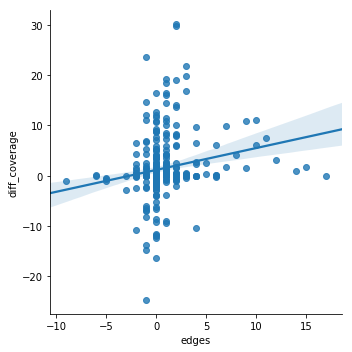

In [181]:
diff_result = pd.concat([diff_in_graph_per_app, diff_in_coverage_per_app], axis=1, sort=False).dropna()
sns.lmplot(x='edges', y='diff_coverage', data=diff_result, fit_reg=True)
diff_result.describe()

In [188]:
number_of_unique_screens_per_app = valid_test_graph[['strategy', 'app', 'source', 'target']].melt(
    id_vars=['strategy', 'app'])

number_of_unique_screens_per_app.head()

,strategy,app,variable,value
0,systematic,nl.meetmijntijd.imtdesmoines,source,nl.meetmijntijd.mmt.activities.MainActivity
1,random,nl.meetmijntijd.imtdesmoines,source,nl.meetmijntijd.mmt.activities.SettingsActivity
2,random,nl.meetmijntijd.imtdesmoines,source,nl.meetmijntijd.mmt.activities.MainActivity
3,systematic,com.doapps.android.mln.wthr_weather,source,com.doapps.android.mln.app.activity.WarmWelcom...
4,random,com.doapps.android.mln.wthr_weather,source,com.doapps.android.mln.app.activity.HomeScreen...


In [189]:
ran_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'random')].drop(['strategy'],
                                                                                                       axis=1)
sys_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'systematic')].drop(['strategy'],
                                                                                                           axis=1)

In [192]:
diff_in_unique_screens = (ran_n.groupby(['app']).value.nunique() - sys_n.groupby(['app']).value.nunique()).dropna()
diff_in_unique_screens.head()

app
androidlab.carlog                              0.0
asp.aniemo.pack6.ext                           0.0
bestfreelivewallpapers.funny_photo_editor      0.0
bestfreelivewallpapers.love_photo_frames_hd    0.0
biz.andxor.hearingaid                          0.0
Name: value, dtype: float64

C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,screens,diff_coverage
count,370.000000,370.000000
mean,0.462162,1.421132
std,1.035901,5.691902
min,-2.000000,-24.685185
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.982132
max,6.000000,30.198718


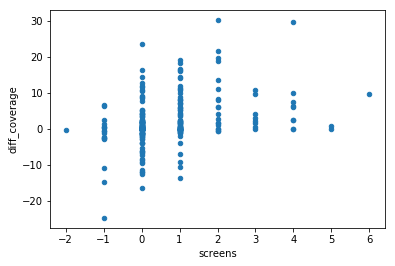

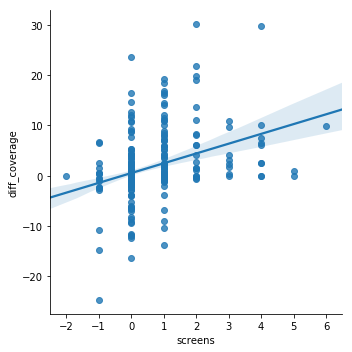

In [195]:
diff_result = pd.concat([diff_in_unique_screens.to_frame("screens"), diff_in_coverage_per_app], axis=1, sort=False)
diff_result.plot.scatter(x='screens', y='diff_coverage')
sns.lmplot(x='screens', y='diff_coverage', data=diff_result, fit_reg=True)
diff_result.describe()


In [202]:
# total_screens_stat =
number_of_unique_screens_per_app_stat = stat_trans_act_graph_df[['app', 'source', 'target']].melt(
    id_vars=['app'])

number_of_unique_screens_per_app_stat.head()

stat_trans_act_graph_df.app.nunique()


300

In [201]:
number_of_unique_screens_per_app_stat.groupby("app").value.count().head()

app
alex.map.maps                                     2
appinventor.ai_agiapplications.CountYourSteps     2
bestfreelivewallpapers.funny_photo_editor        68
bestfreelivewallpapers.love_photo_frames_hd      34
br.com.blackmountain.mylook                      70
Name: value, dtype: int64

In [199]:
random_unique_screens_found_percentage = pd.DataFrame()
random_unique_screens_found_percentage['screens_found'] = ran_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
# random_unique_screens_found_percentage[]
random_unique_screens_found_percentage.count()
# random_unique_screens_found_percentage.sort_values(by="diff_screens", ascending=False).head()

screens_found    269
dtype: int64

In [84]:
systematic_unique_screens_found_percentage = sys_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
systematic_unique_screens_found_percentage = systematic_unique_screens_found_percentage.to_frame("screens_found")
systematic_unique_screens_found_percentage.head()

,screens_found
app,
alex.map.maps,100.000000
androidlab.carlog,NaN
appinventor.ai_agiapplications.CountYourSteps,50.000000
asp.aniemo.pack6.ext,NaN
bestfreelivewallpapers.funny_photo_editor,1.470588


In [87]:
diff_screen_found_percentage = (random_unique_screens_found_percentage - systematic_unique_screens_found_percentage).dropna()
diff_screen_found_percentage.head()

,screens_found
app,
bestfreelivewallpapers.funny_photo_editor,0.000000
bestfreelivewallpapers.love_photo_frames_hd,0.000000
br.com.blackmountain.mylook,1.428571
br.org.altitudesl,0.000000
brdata.cms.base.foodbazaar,-0.568182


In [88]:
random_edges_percentage = pd.DataFrame()
random_edges_percentage['edges_found'] = random_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
random_edges_percentage.head()

,edges_found
app,
alex.map.maps,NaN
androidlab.carlog,NaN
appinventor.ai_agiapplications.CountYourSteps,NaN
asp.aniemo.pack6.ext,NaN
bestfreelivewallpapers.funny_photo_editor,0.0


In [89]:
systematic_edges_percentage = pd.DataFrame()
systematic_edges_percentage['edges_found'] = systematic_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
systematic_edges_percentage.head()

,edges_found
app,
alex.map.maps,100.0
androidlab.carlog,NaN
appinventor.ai_agiapplications.CountYourSteps,0.0
asp.aniemo.pack6.ext,NaN
bestfreelivewallpapers.funny_photo_editor,0.0


In [90]:
diff_edges_found_percentage = (random_edges_percentage - systematic_edges_percentage).dropna()
diff_edges_found_percentage.head()

,edges_found
app,
bestfreelivewallpapers.funny_photo_editor,0.000000
bestfreelivewallpapers.love_photo_frames_hd,0.000000
br.com.blackmountain.mylook,5.714286
br.org.altitudesl,0.000000
brdata.cms.base.foodbazaar,-1.136364


,edges_found,coverage
alex.map.maps,NaN,NaN
androidlab.carlog,NaN,-1.738462
appinventor.ai_agiapplications.CountYourSteps,NaN,NaN
asp.aniemo.pack6.ext,NaN,0.000000
biz.andxor.hearingaid,NaN,0.000000
block.app.wars,NaN,0.000000
br.com.geochenapps.tonguetwister,NaN,NaN
co.instavr.iostest,NaN,5.000000
coloring.book.color,NaN,0.000000
com.BillDirkes.QuickEM,NaN,0.000000


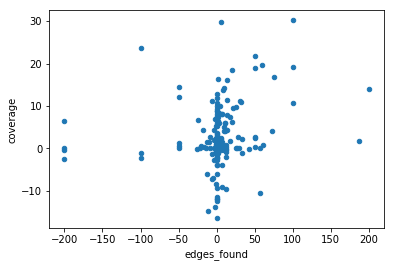

In [104]:
diff_result = pd.concat([diff_edges_found_percentage, diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
diff_result.plot.scatter(x="edges_found", y="coverage")
diff_result.head()


,screens_found,coverage
bestfreelivewallpapers.funny_photo_editor,0.000000,2.054881
bestfreelivewallpapers.love_photo_frames_hd,0.000000,0.000000
br.com.blackmountain.mylook,1.428571,0.461057
br.org.altitudesl,0.000000,-0.361664
brdata.cms.base.foodbazaar,-0.568182,-2.403647


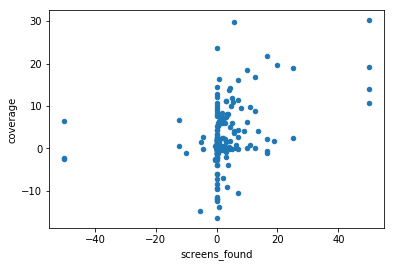

In [107]:
diff_result = pd.concat([diff_screen_found_percentage, diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
diff_result.plot.scatter(x="screens_found", y="coverage")
diff_result.head()

